In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
def read_img(path, grayscale=True):
    #img = cv2.imread(path)
    img = mpimg.imread(path)
    if grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, cmap="gray")
        return img 
    try:
        #cv2.imshow("display", img) 
        plt.imshow(img)
        return img
    except Exception as e:
        print(e)
        return img

In [3]:
img_path = "car1.jpeg"

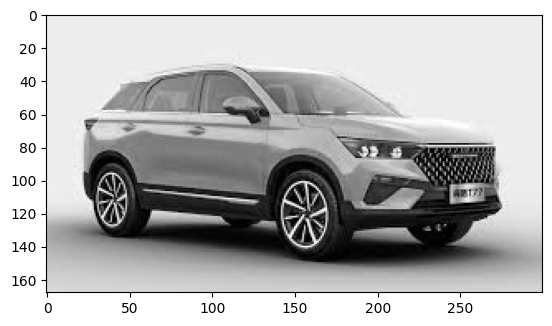

In [4]:
car = read_img(path=img_path, grayscale=True)

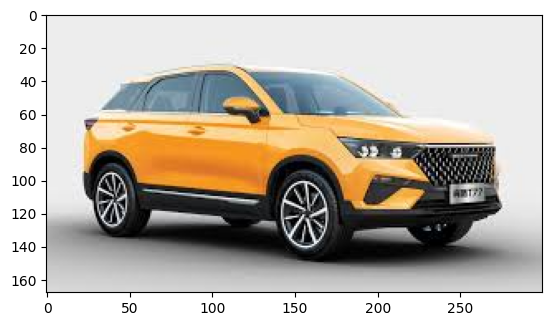

In [5]:
color_car = read_img(path=img_path, grayscale=False)

In [6]:
car.shape

(168, 300)

In [7]:
color_car.shape

(168, 300, 3)

In [8]:
row, col = car.shape
batch = 1 # single image is there 
ch = 1 # grayscale 
reshaped_car_img = car.reshape(batch, row, col, ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [9]:
input_shape = reshaped_car_img.shape[1:]
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS) 
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [10]:
3*3+1

10

In [11]:
out = conv_model.predict(reshaped_car_img)

In [12]:
out

array([[[[-2.773607 ],
         [-2.773607 ],
         [-2.773607 ],
         ...,
         [-2.773607 ],
         [-2.773607 ],
         [-2.773607 ]],

        [[-2.773607 ],
         [-2.773607 ],
         [-2.773607 ],
         ...,
         [-2.773607 ],
         [-2.773607 ],
         [-2.773607 ]],

        [[-2.773607 ],
         [-2.773607 ],
         [-2.773607 ],
         ...,
         [-2.773607 ],
         [-2.773607 ],
         [-2.773607 ]],

        ...,

        [[-1.9875889],
         [-1.9875889],
         [-1.9875889],
         ...,
         [-1.5083449],
         [-1.5083449],
         [-1.5083449]],

        [[-1.6383235],
         [-1.6383235],
         [-1.6383235],
         ...,
         [-1.5317533],
         [-1.5317533],
         [-1.5317533]],

        [[-2.1188152],
         [-2.1188152],
         [-2.1188152],
         ...,
         [-1.6032109],
         [-1.6032109],
         [-1.6032109]]]], dtype=float32)

In [13]:
out.shape

(1, 166, 298, 1)

In [14]:
(168 - 3 + 2 * (0))//1 + 1

166

In [15]:
(300 - 3 + 2 * (0))//1 + 1

298

In [16]:
row, col = out.shape[1:-1]
row, col

(166, 298)

In [17]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [18]:
reshape_out = out.reshape(row, col) 
reshape_out.shape

(166, 298)

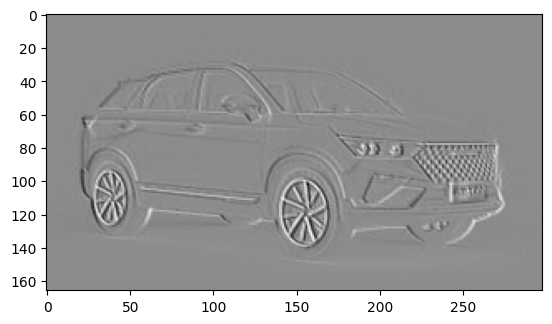

In [19]:
plt.imshow(reshape_out, cmap="gray")

In [20]:
color_car.shape

(168, 300, 3)

In [21]:
# (1,r,c,ch)
row, col, ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row, col, ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [22]:
input_shape = color_car_reshaped.shape[1:]
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS) 
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [23]:
3*3*3+1

28

In [24]:
out = conv_model.predict(color_car_reshaped)

In [25]:
out.shape

(1, 166, 298, 1)

In [26]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [27]:
reshape_out = out.reshape(row, col) 
reshape_out.shape

(166, 298)

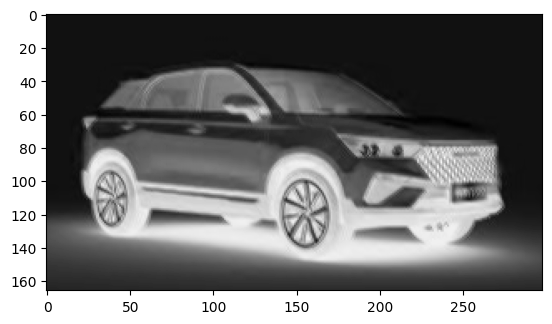

In [28]:
plt.imshow(reshape_out, cmap="gray")

In [29]:
def reshape_in(img, grayscale=True):
    if grayscale:
        row, col = img.shape
        img = img.reshape(1, row, col, 1) # grayscale
        return img 
    else:
        row, col, ch = img.shape
        color_img = img.reshape(1,row, col, ch)
        return color_img

In [30]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
    
    CONV_LAYERS = [
    tf.keras.layers.Conv2D(
        filters=filters, 
        kernel_size=kernel_size, 
        strides=strides, 
        input_shape=input_shape)
    ]

    conv_model = tf.keras.Sequential(CONV_LAYERS) 
    conv_model.summary()
    return conv_model

In [31]:
def apply_conv_model_and_visualize(img, conv_model):
    try:
        out = conv_model.predict(img) 
        print(out.shape) 
        _, row, col, channels = out.shape
        reshape_out = out.reshape(row, col, channels) 
        for channel in range(channels):
            plt.imshow(reshape_out[:,:,channel], cmap="gray")
            plt.show() 
    except Exception as e:
        raise e

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


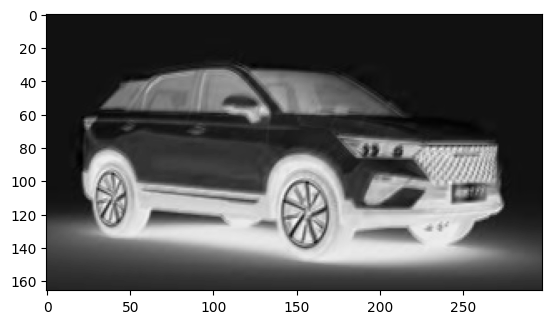

In [33]:
img = read_img(path=img_path, grayscale=False)
input_img = reshape_in(img, grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")
apply_conv_model_and_visualize(input_img,model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)


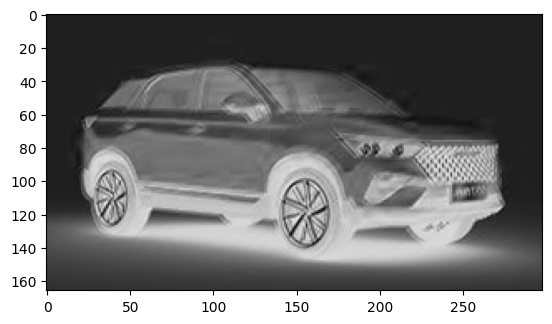

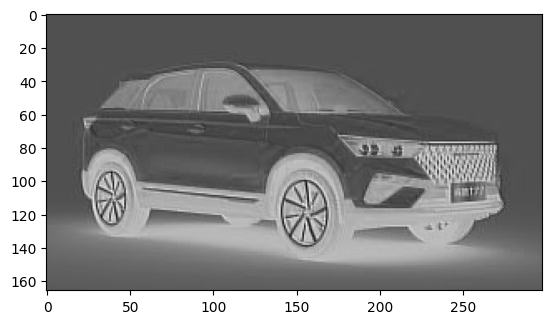

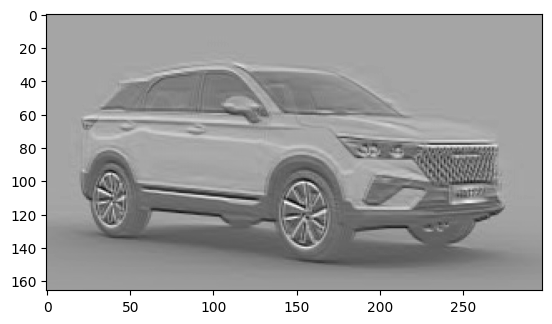

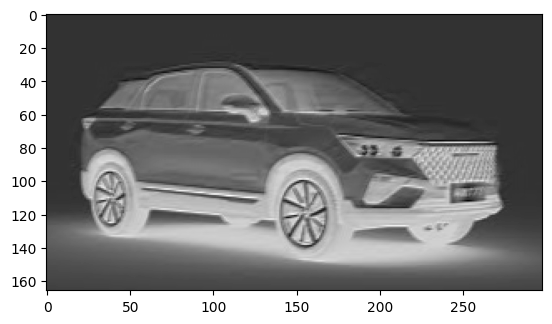

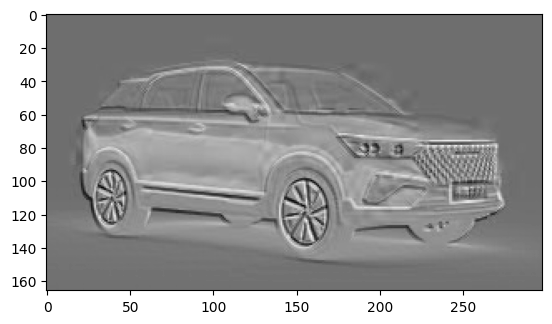

In [34]:
img = read_img(path=img_path, grayscale=False)
input_img = reshape_in(img, grayscale=False)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")
apply_conv_model_and_visualize(input_img,model)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 166, 298, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)


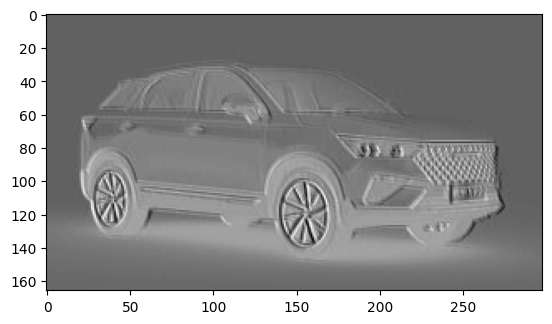

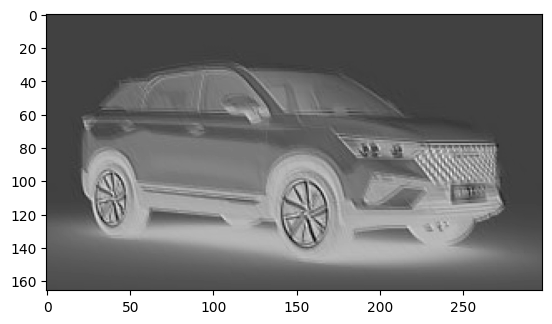

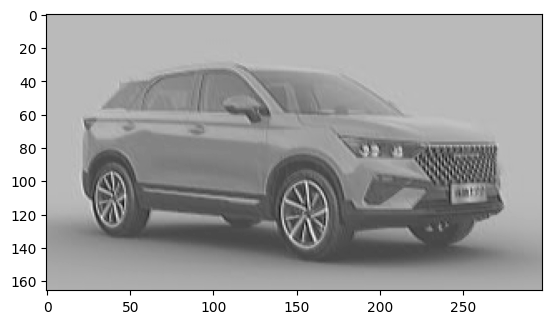

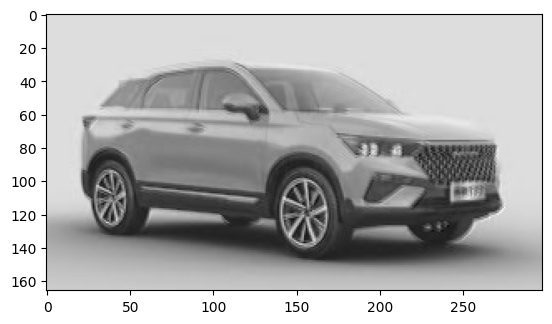

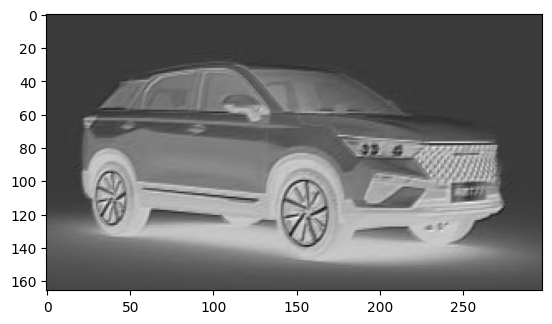

In [35]:
img = read_img(path=img_path, grayscale=True)
input_img = reshape_in(img, grayscale=True)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")
apply_conv_model_and_visualize(input_img,model)